In [1]:
%load_ext autoreload

# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [2]:
%autoreload 2
from src import ODE_euler


[08-07 13:31:40][INFO] 2025-08-07 13:31:40.432882
[08-07 13:31:40][INFO] bravo| 2025-08-07 13:31:40.503451
[08-07 13:31:40][INFO] 2025-08-07 13:31:40.504742
[08-07 13:31:40][INFO] bravo| 2025-08-07 13:31:40.505990


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



t=0.0: Euler=0.3333, Exacta=0.3333, Error=0.0000
t=0.2: Euler=0.1083, Exacta=0.1626, Error=0.0543
t=0.4: Euler=0.1621, Exacta=0.2051, Error=0.0430
t=0.6: Euler=0.3455, Exacta=0.3766, Error=0.0311
t=0.8: Euler=0.6214, Exacta=0.6461, Error=0.0247
t=1.0: Euler=0.9803, Exacta=1.0022, Error=0.0219


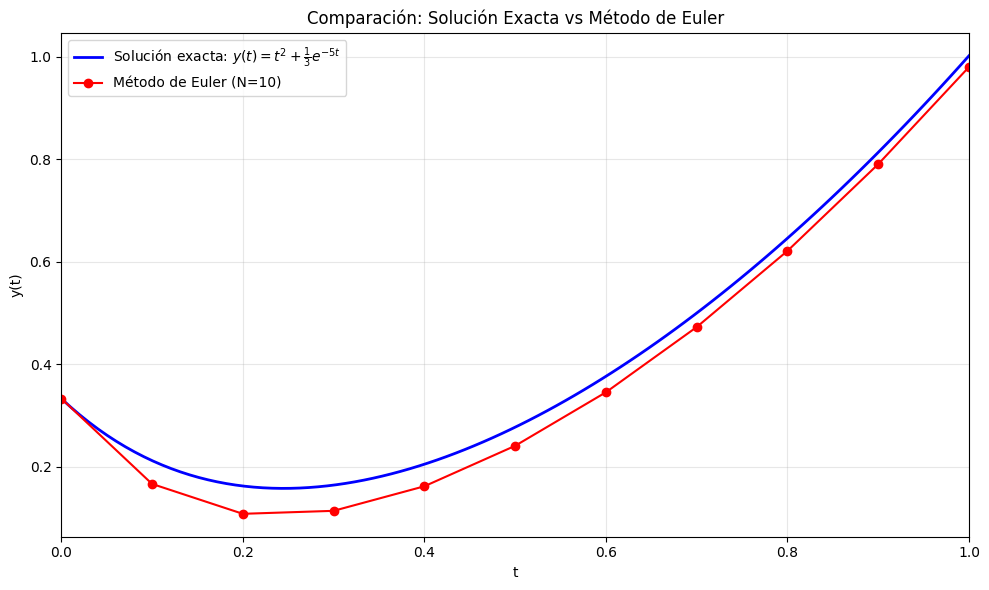

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp

# Definición de la función y la solución exacta
f = lambda t, y: -5*y + 5*t**2 + 2*t
y_exact = lambda t: t**2 + (1/3)*exp(-5*t)

# Parámetros del problema
a, b, y0 = 0.0, 1.0, 1/3
N = 10

# Calcular aproximación con Euler
ys_euler, ts_euler, h = ODE_euler(a, b, f, y0, N)

# Generar puntos para la solución exacta (más puntos para suavidad)
t_exact = np.linspace(a, b, 100)
y_exact_vals = [y_exact(t) for t in t_exact]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact_vals, 'b-', label='Solución exacta: $y(t)=t^2 +\\frac{1}{3}e^{-5t}$', linewidth=2)
plt.plot(ts_euler, ys_euler, 'ro-', label=f'Método de Euler (N={N})', markersize=6, linewidth=1.5)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación: Solución Exacta vs Método de Euler')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(a, b)

# Mostrar valores en algunos puntos específicos
for i in range(0, len(ts_euler), 2):
    t_val = ts_euler[i]
    y_euler_val = ys_euler[i]
    y_exact_val = y_exact(t_val)
    print(f"t={t_val:.1f}: Euler={y_euler_val:.4f}, Exacta={y_exact_val:.4f}, Error={abs(y_euler_val-y_exact_val):.4f}")

plt.tight_layout()
plt.show()

# Errores
Calcule el eeror relativo para diferentes valores de N.

In [3]:
# Calcular error relativo

In [4]:
import numpy as np
from math import exp

# Definición de la f y la solución exacta
f = lambda t, y: -5*y + 5*t**2 + 2*t
y_exact = lambda t: t**2 + (1/3)*exp(-5*t)

def ODE_euler(a, b, f, y_t0, N):
    """Método de Euler explícito para y' = f(t,y)."""
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]
    for _ in range(N):
        y = ys[-1] + h * f(t, ys[-1])
        ys.append(y)
        t += h
        ts.append(t)
    return ys, ts, h

# Parámetros del problema
a, b, y0 = 0.0, 1.0, 1/3

# Cálculo de h para N=10
_, _, h10 = ODE_euler(a, b, f, y0, 10)
print(f"Valor de h (N=10): {h10}")

# Cálculo del error relativo promedio para N = 10, 5 y 20
for N in [10, 5, 20]:
    ys, ts, h = ODE_euler(a, b, f, y0, N)
    errors = [abs(y - y_exact(t)) / abs(y_exact(t)) for y, t in zip(ys, ts)]
    e_rel = sum(errors)/len(errors)
    mant, exp_str = f"{e_rel:.6e}".split('e')
    print(f"N={N}: e_rel = {mant}×10^{exp_str}")


Valor de h (N=10): 0.1
N=10: e_rel = 1.290954×10^-01
N=5: e_rel = 2.797909×10^-01
N=20: e_rel = 6.314570×10^-02
